In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import joblib

In [72]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Data cleaning
#### Cheching for missing values

In [74]:
df.drop([ 'street', 'country', 'sqft_above', 'sqft_basement', 'sqft_lot'], axis=1, inplace=True)

In [75]:
df

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,yr_renovated,city,statezip
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,1.5,0,0,3,1955,2005,Shoreline,WA 98133
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,2.0,0,4,5,1921,0,Seattle,WA 98119
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,1.0,0,0,4,1966,0,Kent,WA 98042
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,1.0,0,0,4,1963,0,Bellevue,WA 98008
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,1.0,0,0,4,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,1.0,0,0,4,1954,1979,Seattle,WA 98133
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,2.0,0,0,3,1983,2009,Bellevue,WA 98007
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,2.0,0,0,3,2009,0,Renton,WA 98059
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,1.0,0,0,3,1974,0,Seattle,WA 98178


In [76]:
df['renovated'] = (df['yr_renovated'] != 0).astype(int)
df['rooms'] = (df['bathrooms'] + df['bedrooms']).round(0).astype(int)
df['floors'] = df['floors'].round(0).astype(int)
df['price'] = df['price'].round(0).astype(int) 
df.head()
col_names = df.columns.tolist()
print(col_names)

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'city', 'statezip', 'renovated', 'rooms']


In [77]:
nan_values = df.isna()

any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()


for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")
        
print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)

print("\nMissing Value Counts in Each Column:")
print(missing_value_count)


Missing Values in the Entire DataFrame?
False

Missing Values in Each Column?
date            False
price           False
bedrooms        False
bathrooms       False
sqft_living     False
floors          False
waterfront      False
view            False
condition       False
yr_built        False
yr_renovated    False
city            False
statezip        False
renovated       False
rooms           False
dtype: bool

Missing Value Counts in Each Column:
date            0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
floors          0
waterfront      0
view            0
condition       0
yr_built        0
yr_renovated    0
city            0
statezip        0
renovated       0
rooms           0
dtype: int64


### Data visualization

Text(0.5, 1.0, 'Houses which have waterfront')

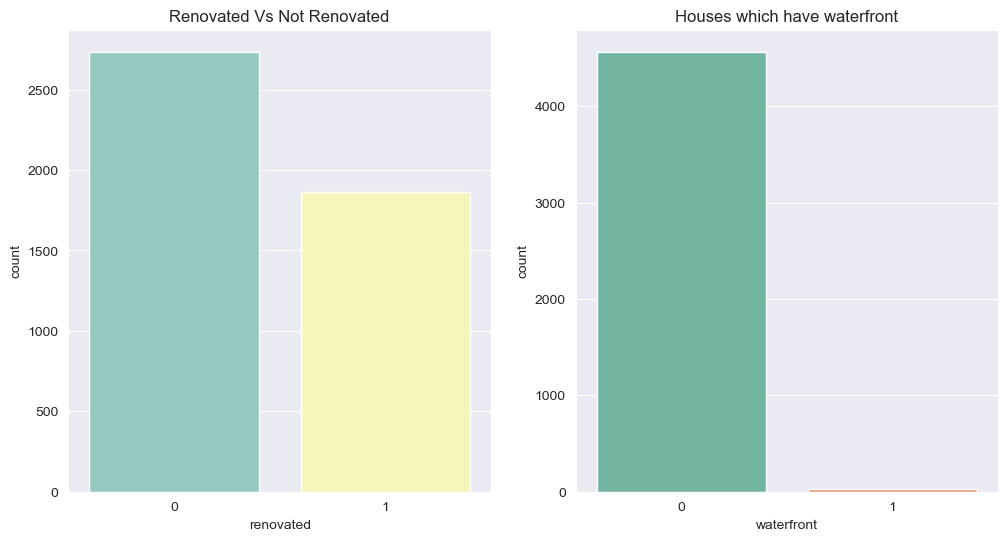

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2 , 1)
sns.countplot(x='renovated', data=df, palette='Set3')
plt.title('Renovated Vs Not Renovated')

plt.subplot(1, 2 , 2)
sns.countplot(x='waterfront', data=df, palette='Set2')
plt.title('Houses which have waterfront')

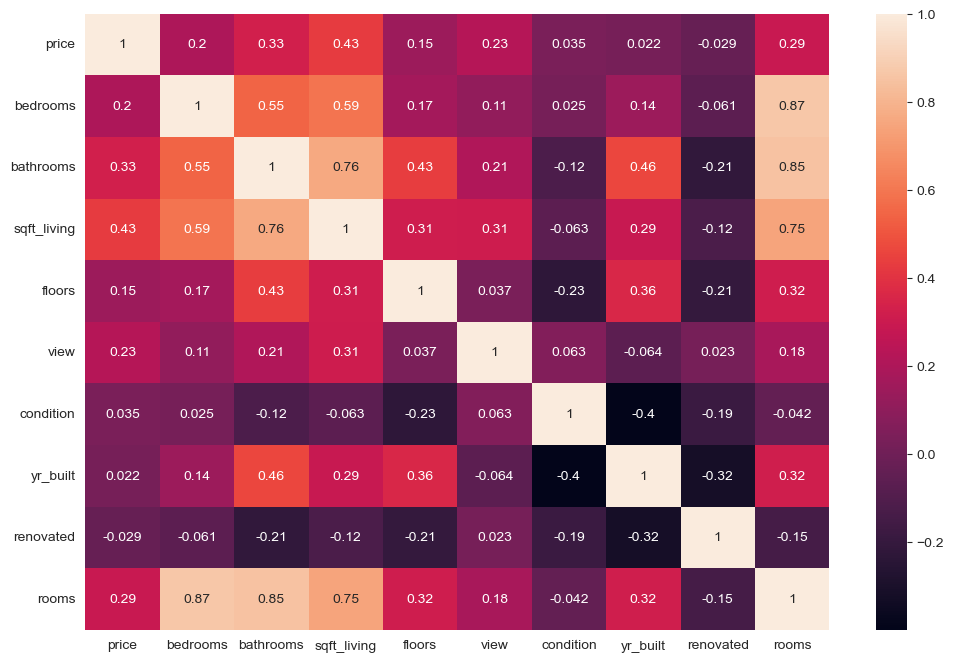

In [79]:
df_corr = df.drop(['city', 'yr_renovated', 'statezip', 'date', 'waterfront'], axis=1)
matrix_corr = df_corr.corr()
figure = plt.figure(figsize=(12, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

In [80]:
df = df.drop(['waterfront'], axis=1)

### Preparation data and creating the model

In [81]:
df_x = df_copy['sqft_living_filtered'].to_numpy()
df_y = df_copy['price_filtered'].to_numpy()

indexes_to_remove = np.where(df_y == 0)[0]
df_y = np.delete(df_y, indexes_to_remove)
df_x = np.delete(df_x, indexes_to_remove)

df_copy.dropna(subset=['price_filtered', 'sqft_living_filtered'], inplace=True)
if df_copy[['price_filtered', 'sqft_living_filtered']].isna().any().any():
    print("There are still NaN values in the data.")
else:
    print("No NaN values found, proceeding with model training.")

No NaN values found, proceeding with model training.


In [82]:
df_x = df_x.reshape(-1, 1)
dx_y = df_y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (3567, 1)
y_train shape: (3567,)


In [83]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 38689685963.44672
R-squared: 0.4793920505088387


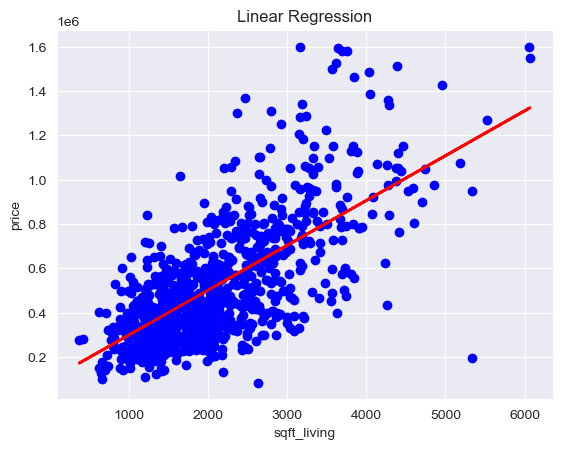

In [85]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression')
plt.show()

In [86]:
joblib.dump(model, 'linear_regression.pkl')

['linear_regression.pkl']

In [87]:
model = joblib.load('linear_regression.pkl')
data_test = pd.DataFrame({'sqft_living': [0.6, 0.2, 1]})
predictions = model.predict(data_test)
print(predictions)

[97072.46865964 96991.61375549 97153.32356378]


D:\Downloads\ym\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
